# Monte Carlo Integration

Let's compute the area under the function $f(x)=x^{3/4}$ for $0<x<2$.  First, let's plot the function.

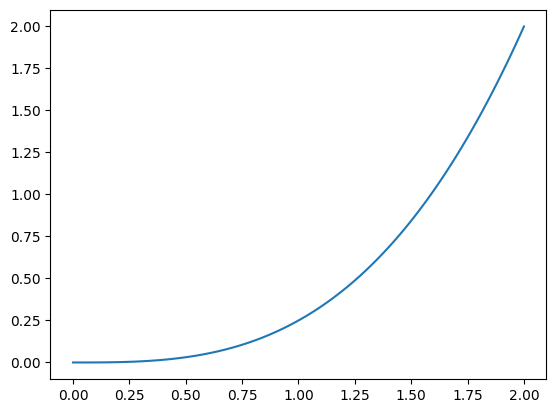

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3/4

x = np.linspace(0, 2, 100)
fx = f(x)
p = plt.plot(x, fx)

## Numerical integration

- Rectangle rule

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Integration_rectangle.svg/640px-Integration_rectangle.svg.png)

$$A = \sum_i f(x_i)\Delta x$$

- Trapezoidal rule:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Integration_trapezoid.svg/640px-Integration_trapezoid.svg.png)

- See: https://en.wikipedia.org/wiki/Numerical_integration

Now, let's compute the area using the trapezoid rule.



In [8]:
area = round(np.trapz(fx, x), 2)
print("The area is:", area)

The area is: 1.0


## Monte Carlo Integration: Sampling Method

Area for n=1000000 is 0.9995582623732217


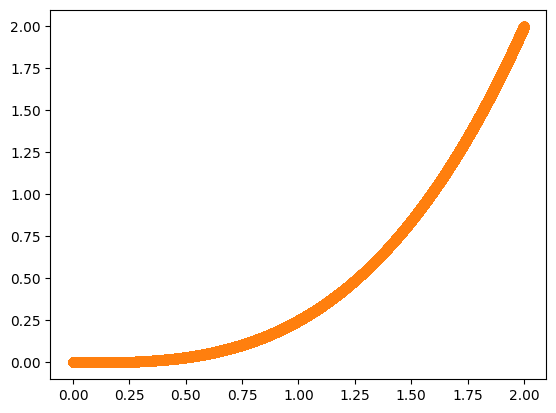

In [15]:
def make_sample(a, b, n=10):
    """
    a, b: interval
    n: sample size
    """
    return np.random.rand(n)*(b - a) + a

def evaluate_sample(m):
    """
    m: sample (array)
    """
    return f(m)


(a, b) = (0, 2)
t_samples = [1000000]
for t in t_samples:
    x_m = make_sample(a, b, t)
    f_m = evaluate_sample(x_m)
    area = (b-a)*sum(f_m)/t
    print("Area for n="+str(t), "is", area)
        

plt.plot(x, fx)
p = plt.plot(x_m, f_m, 'o')

**Assignment 1**: What is the number of samples required for this method to guarantee a precision of $10^{-3}$ in 10 succesive executions?

Area for n=10000000 is 0.9999441714979375
Area for n=10000000 is 0.9999616665650749
Area for n=10000000 is 0.9996831963346208
Area for n=10000000 is 0.9998951181467949
Area for n=10000000 is 1.0000743720725087
Area for n=10000000 is 0.9994862555049555
Area for n=10000000 is 0.9998533761879541
Area for n=10000000 is 0.999981211935983
Area for n=10000000 is 1.0006680967320387
Area for n=10000000 is 0.9994591531749699


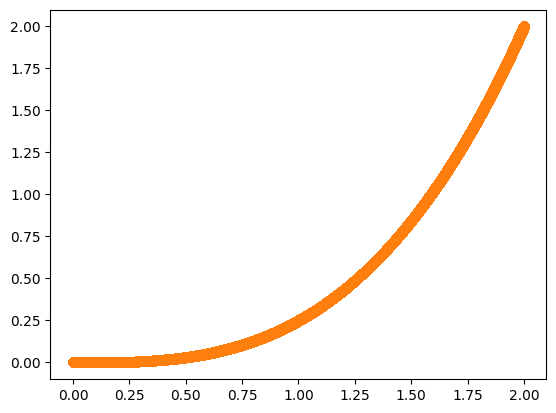

In [35]:
## WRITE YOUR CODE HERE
def make_sample(a, b, n=10):
    """
    a, b: interval
    n: sample size
    """
    return np.random.rand(n)*(b - a) + a

def evaluate_sample(m):
    """
    m: sample (array)
    """
    return f(m)

i = 0
while i < 10:
    (a, b) = (0, 2)
    t_samples = [10000000]
    for t in t_samples:
        x_m = make_sample(a, b, t)
        f_m = evaluate_sample(x_m)
        area = (b-a)*sum(f_m)/t
        print("Area for n="+str(t), "is", area)
        i +=1

plt.plot(x, fx)
p = plt.plot(x_m, f_m, 'o')
## --------------------

Para garantizar que este metodo tenga una precision de 10^-3 se deben realizar 10 000 000 de samples.

## Monte Carlo Integration: Hit and Miss Method

- The square $\{a-b, 0-c\}$ contains the curve under which we want to calculate the area. So, we can generate random points $x_r$ and $y_r$ at the limits of $X:a,b$ and $Y:0,c$, respectively.  Then, we check if this point $(x_r, y_r)$ is within the area of interest (*i.e.*, below the curve).

Area for n=10000000 is 1.0003484


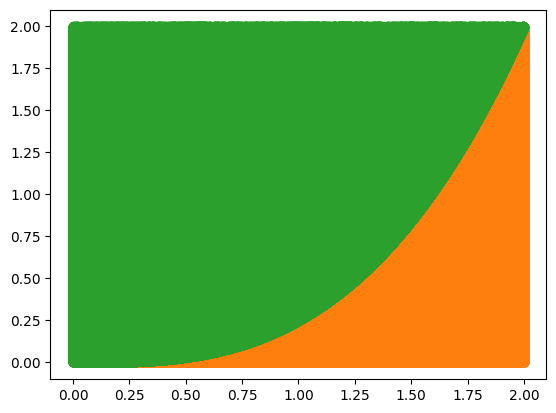

In [21]:
def hit_and_miss(a, b, c, n):
    x_in, x_out = [], []
    y_in, y_out = [], []
    for i in range(n):
        x_r = make_sample(a, b, 1)
        y_r = make_sample(0, c, 1)
        if y_r < f(x_r):
            x_in += [x_r]
            y_in += [y_r]
        else:
            x_out += [x_r]
            y_out += [y_r]
    return x_in, y_in, x_out, y_out

(a, b, c) = (0, 2, 2)
t_samples = [10000000]
square_area = (b-a)*c
for t in t_samples:
    points = hit_and_miss(a, b, c, t)
    area = len(points[0])/t * square_area
    print("Area for n="+str(t), "is", area)

plt.plot(x, fx)
plt.plot(points[0], points[1], 'o')
p = plt.plot(points[2], points[3], 'o')

**Assignment 2**: What is the number of samples required for this method to guarantee a precision of $10^{-3}$ in 10 succesive executions?

Area for n=10000000 is 0.999804
Area for n=10000000 is 1.0005048
Area for n=10000000 is 0.9995596
Area for n=10000000 is 0.9995652
Area for n=10000000 is 1.0003048
Area for n=10000000 is 0.9999096
Area for n=10000000 is 0.9994888
Area for n=10000000 is 0.99968
Area for n=10000000 is 0.9994332
Area for n=10000000 is 1.0008704


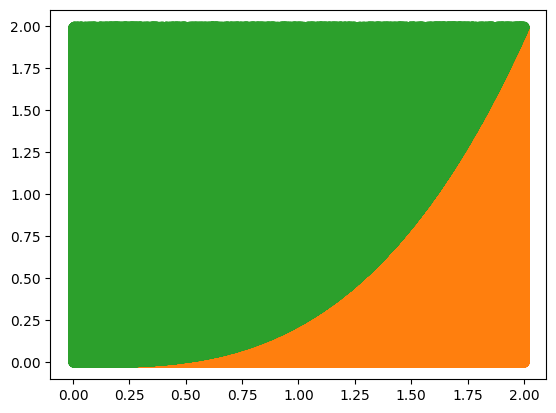

In [34]:
## WRITE YOUR CODE HERE
def hit_and_miss(a, b, c, n):
    x_in, x_out = [], []
    y_in, y_out = [], []
    for i in range(n):
        x_r = make_sample(a, b, 1)
        y_r = make_sample(0, c, 1)
        if y_r < f(x_r):
            x_in += [x_r]
            y_in += [y_r]
        else:
            x_out += [x_r]
            y_out += [y_r]
    return x_in, y_in, x_out, y_out

i = 0
while i < 10:
    (a, b, c) = (0, 2, 2)
    t_samples = [10000000]
    square_area = (b-a)*c
    for t in t_samples:
        points = hit_and_miss(a, b, c, t)
        area = len(points[0])/t * square_area
        print("Area for n="+str(t), "is", area)
        i+=1

plt.plot(x, fx)
plt.plot(points[0], points[1], 'o')
p = plt.plot(points[2], points[3], 'o')
## --------------------

Para garantizar que este metodo tenga una precision de 10^-3 se deben realizar 10 000 000 de samples.

## Inverse transform sampling

The main distributions have been implemented as a function in many programming languages. But if we need to model stochastic processes that do not follow any of the common distributions, we can generate random values using the method known as *Universality of the Uniform* $$X=F^{-1}(U)$$

If we evaluate a uniform distribution in the inverse of the accumulated $F^{−1}$, we obtain a random variable with cdf $F$.  For instance:
- pdf $\Rightarrow x^{3/4}$
- cdf $\Rightarrow \int_{0}^x t^{3/4}dt = x^4/16$
- Inverse cdf $\Rightarrow u=x^4/16 \Rightarrow x=(16u)^{1/4} = 2u^{1/4}$



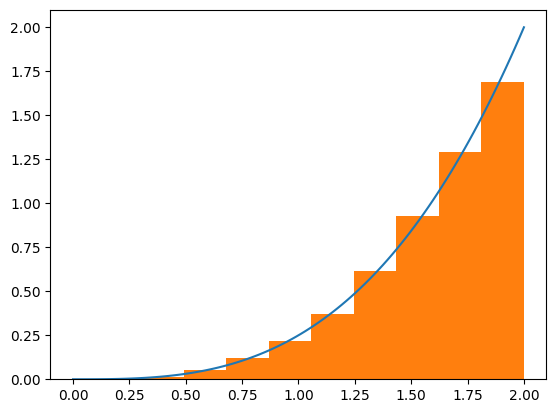

In [33]:
def Finv(n):
    u = np.random.rand(n)
    return 2*u**(1/4)

n = 10000
x_rvs = Finv(n)
plt.plot(x, fx)
h = plt.hist(x_rvs, density=True)

**Assignment 3**: How is the previous behavior with $n\in[1000, 10000]$?

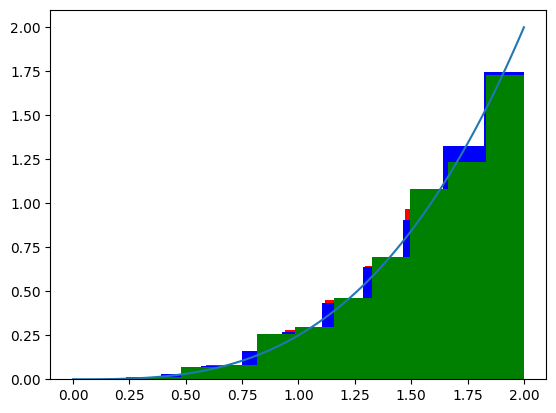

In [43]:
## WRITE YOUR CODE HERE
n
n1 = 10000
n2 = 1000

x_rvs = Finv(n)
x_rvs1 = Finv(n1)
x_rvs2 = Finv(n2)
plt.plot(x, fx)
h = plt.hist(x_rvs, density=True, color='red', label='Histogram 1')
j = plt.hist(x_rvs1, density=True, color='blue', label='Histogram 2')
k = plt.hist(x_rvs2, density=True, color='green', label='Histogram 3')
##---------------------

Comparando con la grafica anterior, podemos ver que cuadno n = 1000 a diferencia de 100, el histograma se acerca mas a la funcion graficada, siendo este mas preciso. Por otro lado al ser n = 10000 a diferencia de 100 y 1000 el histograma se acerca a uun mas a la funcion permitiendo concluir que mientras mayor sea n, el histograma será mas preciso y cercano a la funcion

What happens if it is not possible to calculate the inverse or it is not trivial to calculate it?  We can use the reject method, which is very similar to the hit and miss method.

In [ ]:
n = 100
(a, b, c) = (0, 2, 2)
x_rvs = []
i = 0
while i < n:
    x_r = a + (b - a)*np.random.rand()
    y_r = c * np.random.rand()
    if y_r < f(x_r):
        x_rvs += [x_r]
        i += 1

plt.plot(x, fx)
h = plt.hist(x_rvs, density=True)

## Exercises

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/MonteCarloIntegrationCircle.svg/220px-MonteCarloIntegrationCircle.svg.png)

**Assignment 4**: Compute the area inside the cicle using Monte Carlo integration: the hit and miss method.

Area for n=100000 is 3.14628


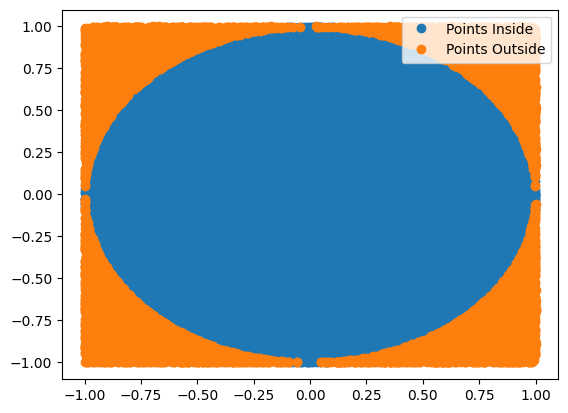

In [52]:
## WRITE YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt

# Define the circle function using np.sqrt and correct the exponentiation operator to **
def circuloFuncion(x):
    return np.sqrt(1 - (x ** 2))

# Define the make_sample function to generate random numbers between a and b
def make_sample(a, b, n=10):
    return np.random.uniform(a, b, n)

def hit_and_miss(a, b, c, d, n):
    x_in, x_out = [], []
    y_in, y_out = [], []
    for i in range(n):
        x_r = make_sample(a, b, 1)
        y_r = make_sample(c, d, 1)
        if y_r < circuloFuncion(x_r) and y_r > -circuloFuncion(x_r):
            x_in.append(x_r)
            y_in.append(y_r)
        else:
            x_out.append(x_r)
            y_out.append(y_r)

    return x_in, y_in, x_out, y_out

(a, b, c, d) = (-1, 1, -1, 1)

t_samples = [100000]
square_area = 4

for t in t_samples:
    points = hit_and_miss(a, b, c, d, t)
    area = len(points[0]) / t * square_area
    print("Area for n=" + str(t), "is", area)

x = np.linspace(a, b, 100)
fx = [circuloFuncion(xi) for xi in x]

plt.plot(points[0], points[1], 'o', label='Points Inside')
plt.plot(points[2], points[3], 'o', label='Points Outside')
plt.legend()  # Add a legend to the plot
plt.show()  # Display the plot



**Assignment 5**: Compute the same area (*i.e.*, inside the circle) using Monte Carlo integration: the sampling method.

Area for n=10 is 3.4736317760539306
Area for n=100 is 3.091857034701846
Area for n=1000 is 3.1763311096893365
Area for n=10000 is 3.134895289586649
Area for n=1000000 is 3.1423485009962717


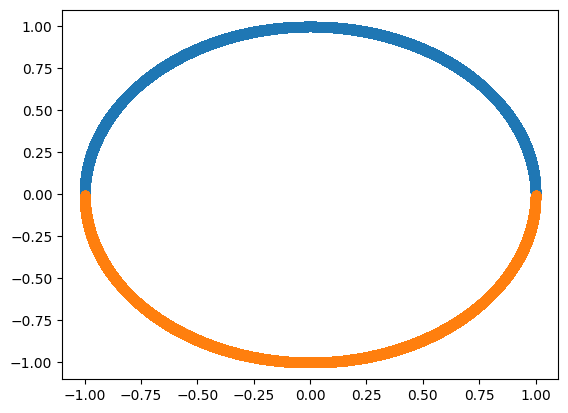

In [53]:
## WRITE YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt

def circuloFuncion(x):
    return np.sqrt(1 - (x ** 2))

def make_sample(a, b, n=10):
    """
    a, b: interval
    n: sample size
    """
    return np.random.rand(n)*(b - a) + a

def evaluate_sample(m):
    """
    m: sample (array)
    """
    return circuloFuncion(m)

def evaluate_sample1(m):
    """
    m: sample (array)
    """
    return -circuloFuncion(m)

(a, b) = (-1, 1)
t_samples = [10, 100, 1000, 10000, 1000000]
for t in t_samples:
    x_m = make_sample(a, b, t)
    f_m = evaluate_sample(x_m)
    f_m1 = evaluate_sample1(x_m)
    area1 = (b-a)*sum(f_m)/t
    area2 = (b-a)*sum(f_m1)/t
    area = area1 - area2
    print("Area for n="+str(t), "is", area)

#plt.plot(x, fx)
p = plt.plot(x_m, f_m, 'o')
p2 = plt.plot(x_m, f_m1, 'o')

##---------------------

**Assignment 6**: Generate 10000 random numbers that correspond to a PDF given by $$f(x)=\begin{cases} x/2, & 0\le x\le 2\\ 0, & elsewhere \end{cases}$$ Prove your implementation generating the histogram for those numbers.

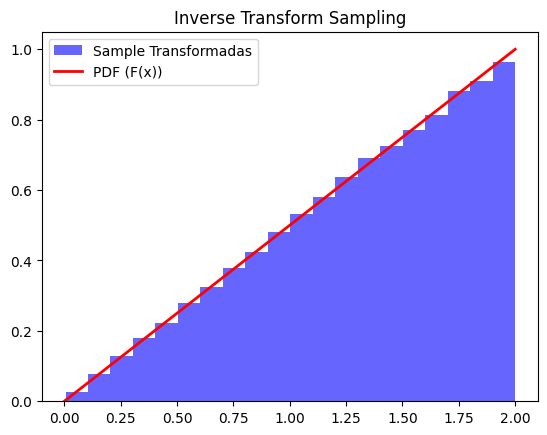

In [1]:
## WRITE YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt


def pdf(x):
    if 0 <= x <= 2:
        return x / 2
    else:
        return 0

def cdf(x):
    if x < 0:
        return 0
    elif 0 <= x <= 2:
        return (x ** 2) / 4
    else:
        return 1

def cdfInverso(p):
    if 0 <= p <= 1:
        return 2 * np.sqrt(p)

# Number of samples to generate
n = 100000

# Generate uniform random numbers
samples = np.random.uniform(0, 1, n)

# Use the inverse CDF to transform uniform samples into the desired distribution
samplesTransformadas = [cdfInverso(p) for p in samples]

# Plot the transformed samples
plt.hist(samplesTransformadas, bins=20, density=True, alpha=0.6, color='b', label='Sample Transformadas')
x = np.linspace(0, 2, 100)
y = [pdf(val) for val in x]
plt.plot(x, y, 'r-', lw=2, label='PDF (F(x))')
plt.legend()
plt.title("Inverse Transform Sampling")
plt.show()



## --------------------